In [ ]:
# the following code takes scraped data from glassdoor and compares industries with the amount of recent job postings available on glassdoor
# the result is displayed in a horizontal bar chart, where tech companies are highlighted a certain color
# interestingly enough, on average, tech industries don't have many available jobs
# however, if job postings are summed up, tech industries are actually quite plentiful
# this suggests that there are certain tech companies that have a lot more job postings available compared to other tech companies

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from numpy import nan as NA

# open up the scraped company information and convert it into a dataframe
list_json = 'all_company_info.json'
with open(list_json) as f:
    company_info = json.load(f)
    
company_df = pd.DataFrame(company_info)
company_df

,Benefits URL,Competitors,Founded,Headquarters,Industry,Jobs Available,Locations,Name,Now known as,Overview URL,Part of,Revenue,Salary URL,Size,Type,Website
0,https://www.glassdoor.com/Benefits/Bank-of-Ame...,NaN,1904,"Charlotte, NC",Banks & Credit Unions,6.8k,N/A,Bank of America,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Bank-of-Ameri...,10000+ employees,Company - Public (BAC),www.bankofamerica.com
1,https://www.glassdoor.com/Benefits/US-Navy-US-...,NaN,1775,"San Diego, CA",Federal Agencies,2.8k,N/A,US Navy,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$2 to $5 billion (USD) per year,https://www.glassdoor.com/Salary/US-Navy-Salar...,1001 to 5000 employees,Government,www.navy.com
2,https://www.glassdoor.com/Benefits/Macy-s-US-B...,NaN,1858,"Cincinnati, OH","Department, Clothing, & Shoe Stores",3.6k,"[Cincinnati, OH, New York, NY, San Francisco, CA]",Macy's,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Macy-s-Salari...,10000+ employees,Company - Public (M),www.macysjobs.com
3,https://www.glassdoor.com/Benefits/AT-and-T-US...,NaN,1983,"Dallas, TX",Telecommunications Services,2.1k,N/A,AT&T,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/AT-and-T-Sala...,10000+ employees,Company - Public (T),www.att.jobs
4,https://www.glassdoor.com/Benefits/Intuit-US-B...,NaN,1983,"Mountain View, CA",Computer Hardware & Software,1.1k,"[Bengaluru (India), Mountain View, CA, San Die...",Intuit,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$2 to $5 billion (USD) per year,https://www.glassdoor.com/Salary/Intuit-Salari...,5001 to 10000 employees,Company - Public (INTU),www.intuit.com
5,https://www.glassdoor.com/Benefits/US-Marine-C...,Unknown,1775,"Arlington, VA",Federal Agencies,95,"[Arlington, VA, Beaufort, SC, Camp Lejeune, NC...",US Marine Corps,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,Unknown / Non-Applicable per year,https://www.glassdoor.com/Salary/US-Marine-Cor...,10000+ employees,Government,www.marines.mil
6,https://www.glassdoor.com/Benefits/Walmart-US-...,NaN,1962,"Bentonville, AR","Department, Clothing, & Shoe Stores",1.4k,N/A,Walmart,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Walmart-Salar...,10000+ employees,Company - Public (WMT),careers.walmart.com
7,https://www.glassdoor.com/Benefits/The-Home-De...,NaN,1978,"Atlanta, GA",NaN,23k,N/A,The Home Depot,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/The-Home-Depo...,10000+ employees,Company - Public (HD),www.homedepot.com
8,https://www.glassdoor.com/Benefits/Yahoo-US-Be...,"Google, Microsoft, Facebook",1994,"Sunnyvale, CA",Internet,2,"[Boston, MA, Burbank, CA, Champaign, IL, Hills...",Yahoo,NaN,https://www.glassdoor.com/Overview/Working-at-...,Verizon,$2 to $5 billion (USD) per year,https://www.glassdoor.com/Salary/Yahoo-Salarie...,5001 to 10000 employees,Company - Public (YHOO),www.yahoo.com
9,https://www.glassdoor.com/Benefits/Salesforce-...,NaN,1999,"San Francisco, CA",Computer Hardware & Software,2.2k,N/A,Salesforce,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Salesforce-Sa...,10000+ employees,Company - Public (CRM),www.salesforce.com


In [142]:
# change -- values to N/A
company_df = company_df.replace('--', NA)

# drop N/A values in Jobs Available
cleaned_df = company_df.dropna(subset = ['Industry', 'Jobs Available'])

# convert k to 1000
# used this code as reference on how to replace the characters https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe
cleaned_df['Jobs Available'] = (cleaned_df['Jobs Available'].replace(r'[k]+$', '', regex=True).astype(float) * \
              cleaned_df['Jobs Available'].str.extract(r'[\d\.]+([k]+)', expand=False)
                .fillna(1)
                .replace(['k'], [10**3]).astype(int))

# store the cleaned_df as a csv file
cleaned_df.to_csv("job_cleaned.csv", index=False, encoding='utf-8')
cleaned_df


/home/tpeng3/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Benefits URL,Competitors,Founded,Headquarters,Industry,Jobs Available,Locations,Name,Now known as,Overview URL,Part of,Revenue,Salary URL,Size,Type,Website
0,https://www.glassdoor.com/Benefits/Bank-of-Ame...,NaN,1904,"Charlotte, NC",Banks & Credit Unions,6800.0,N/A,Bank of America,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Bank-of-Ameri...,10000+ employees,Company - Public (BAC),www.bankofamerica.com
1,https://www.glassdoor.com/Benefits/US-Navy-US-...,NaN,1775,"San Diego, CA",Federal Agencies,2800.0,N/A,US Navy,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$2 to $5 billion (USD) per year,https://www.glassdoor.com/Salary/US-Navy-Salar...,1001 to 5000 employees,Government,www.navy.com
2,https://www.glassdoor.com/Benefits/Macy-s-US-B...,NaN,1858,"Cincinnati, OH","Department, Clothing, & Shoe Stores",3600.0,"[Cincinnati, OH, New York, NY, San Francisco, CA]",Macy's,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Macy-s-Salari...,10000+ employees,Company - Public (M),www.macysjobs.com
3,https://www.glassdoor.com/Benefits/AT-and-T-US...,NaN,1983,"Dallas, TX",Telecommunications Services,2100.0,N/A,AT&T,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/AT-and-T-Sala...,10000+ employees,Company - Public (T),www.att.jobs
4,https://www.glassdoor.com/Benefits/Intuit-US-B...,NaN,1983,"Mountain View, CA",Computer Hardware & Software,1100.0,"[Bengaluru (India), Mountain View, CA, San Die...",Intuit,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$2 to $5 billion (USD) per year,https://www.glassdoor.com/Salary/Intuit-Salari...,5001 to 10000 employees,Company - Public (INTU),www.intuit.com
5,https://www.glassdoor.com/Benefits/US-Marine-C...,Unknown,1775,"Arlington, VA",Federal Agencies,95.0,"[Arlington, VA, Beaufort, SC, Camp Lejeune, NC...",US Marine Corps,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,Unknown / Non-Applicable per year,https://www.glassdoor.com/Salary/US-Marine-Cor...,10000+ employees,Government,www.marines.mil
6,https://www.glassdoor.com/Benefits/Walmart-US-...,NaN,1962,"Bentonville, AR","Department, Clothing, & Shoe Stores",1400.0,N/A,Walmart,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Walmart-Salar...,10000+ employees,Company - Public (WMT),careers.walmart.com
8,https://www.glassdoor.com/Benefits/Yahoo-US-Be...,"Google, Microsoft, Facebook",1994,"Sunnyvale, CA",Internet,2.0,"[Boston, MA, Burbank, CA, Champaign, IL, Hills...",Yahoo,NaN,https://www.glassdoor.com/Overview/Working-at-...,Verizon,$2 to $5 billion (USD) per year,https://www.glassdoor.com/Salary/Yahoo-Salarie...,5001 to 10000 employees,Company - Public (YHOO),www.yahoo.com
9,https://www.glassdoor.com/Benefits/Salesforce-...,NaN,1999,"San Francisco, CA",Computer Hardware & Software,2200.0,N/A,Salesforce,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Salesforce-Sa...,10000+ employees,Company - Public (CRM),www.salesforce.com
10,https://www.glassdoor.com/Benefits/Facebook-US...,NaN,2004,"Menlo Park, CA",Internet,2700.0,N/A,Facebook,NaN,https://www.glassdoor.com/facebook,NaN,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/Facebook-Sala...,10000+ employees,Company - Public (FB),www.facebook.com


In [140]:
# shorten the df to just name, industry, and jobs available
job_df = cleaned_df[['Industry', 'Jobs Available']]
job_df

# group the df based on Industry names
# there's one that checks all the Jobs Available in the same industry and takes their mean
mean_job = job_df.groupby(['Industry']).mean()
print(mean_job)

# and one that takes their sum
sum_job = job_df.groupby(['Industry']).sum()
print(sum_job)

# store the dataframe as a csv file
mean_job.to_csv("job_mean.csv", index=False, encoding='utf-8')
sum_job.to_csv("job_sum.csv", index=False, encoding='utf-8')

                                          Jobs Available
Industry                                                
Accounting                                   6598.666667
Advertising & Marketing                       704.333333
Aerospace & Defense                          1874.076923
Airlines                                      113.000000
Architectural & Engineering Services         5145.000000
Banks & Credit Unions                        1301.750000
Beauty & Personal Accessories Stores         4066.666667
Biotech & Pharmaceuticals                    1495.000000
Brokerage Services                            529.500000
Building & Personnel Services                5500.000000
Business Service Centers & Copy Shops        2600.000000
Cable, Internet & Telephone Providers        2592.000000
Car Rental                                   4200.000000
Casual Restaurants                           7866.777778
Colleges & Universities                       409.565217
Computer Hardware & Software   

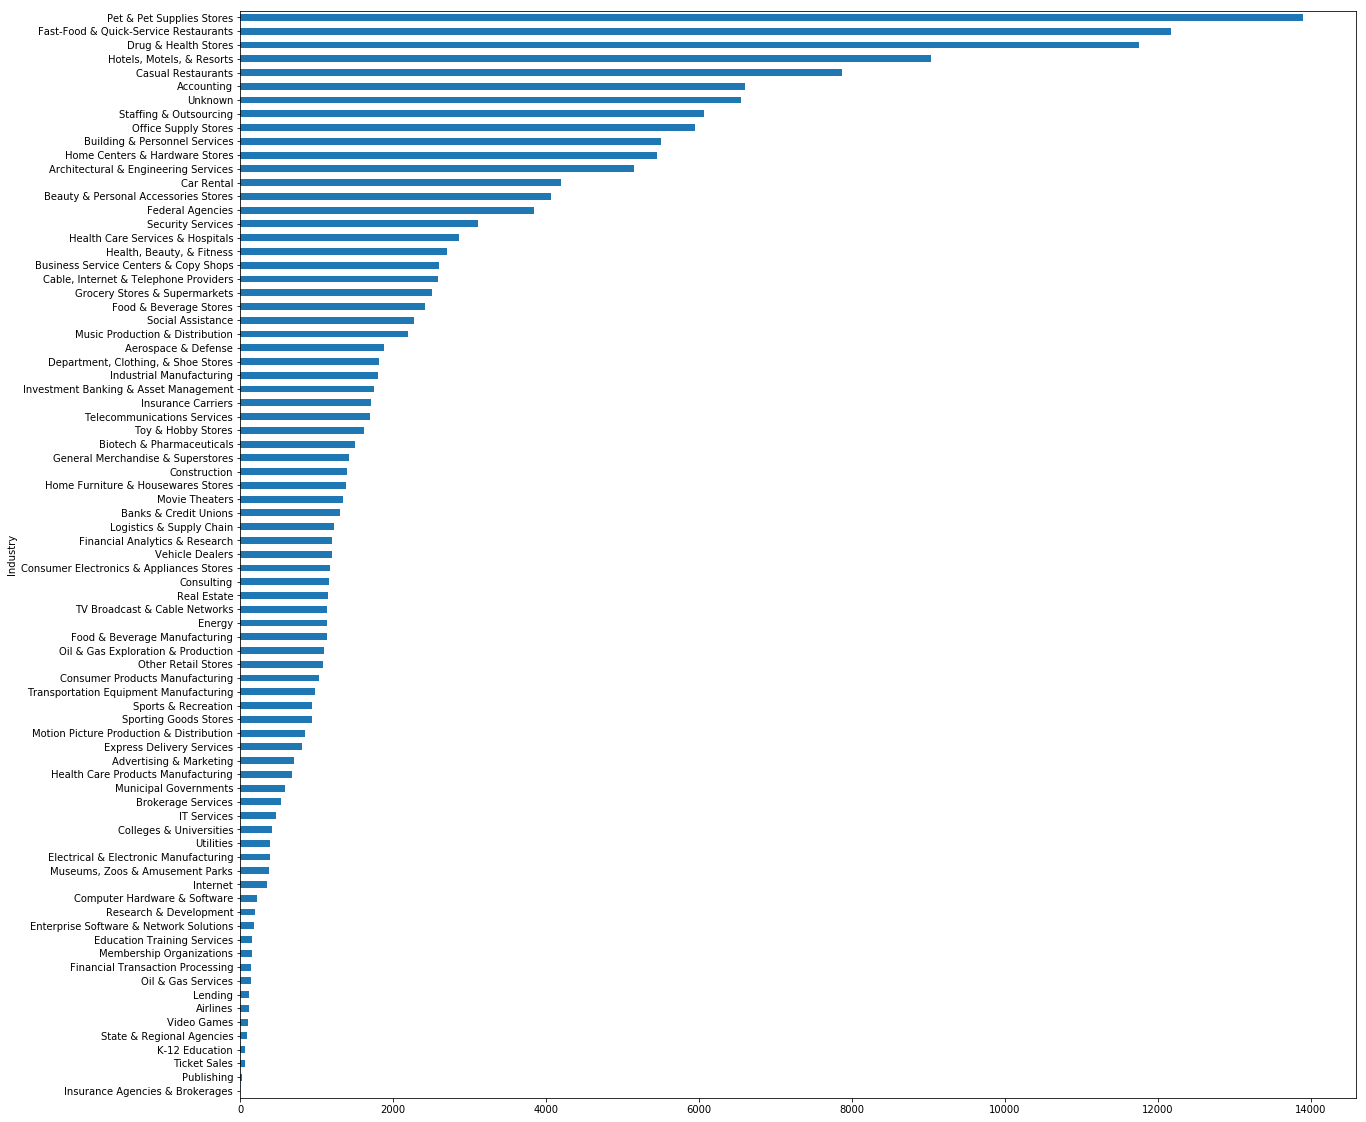

In [44]:
# prints the results of the Jobs available by mean values, ascending up
mean_job = mean_job['Jobs Available'].sort_values(ascending=True)
mean_chart = mean_job.plot.barh(figsize=(20,20))
mean_chart

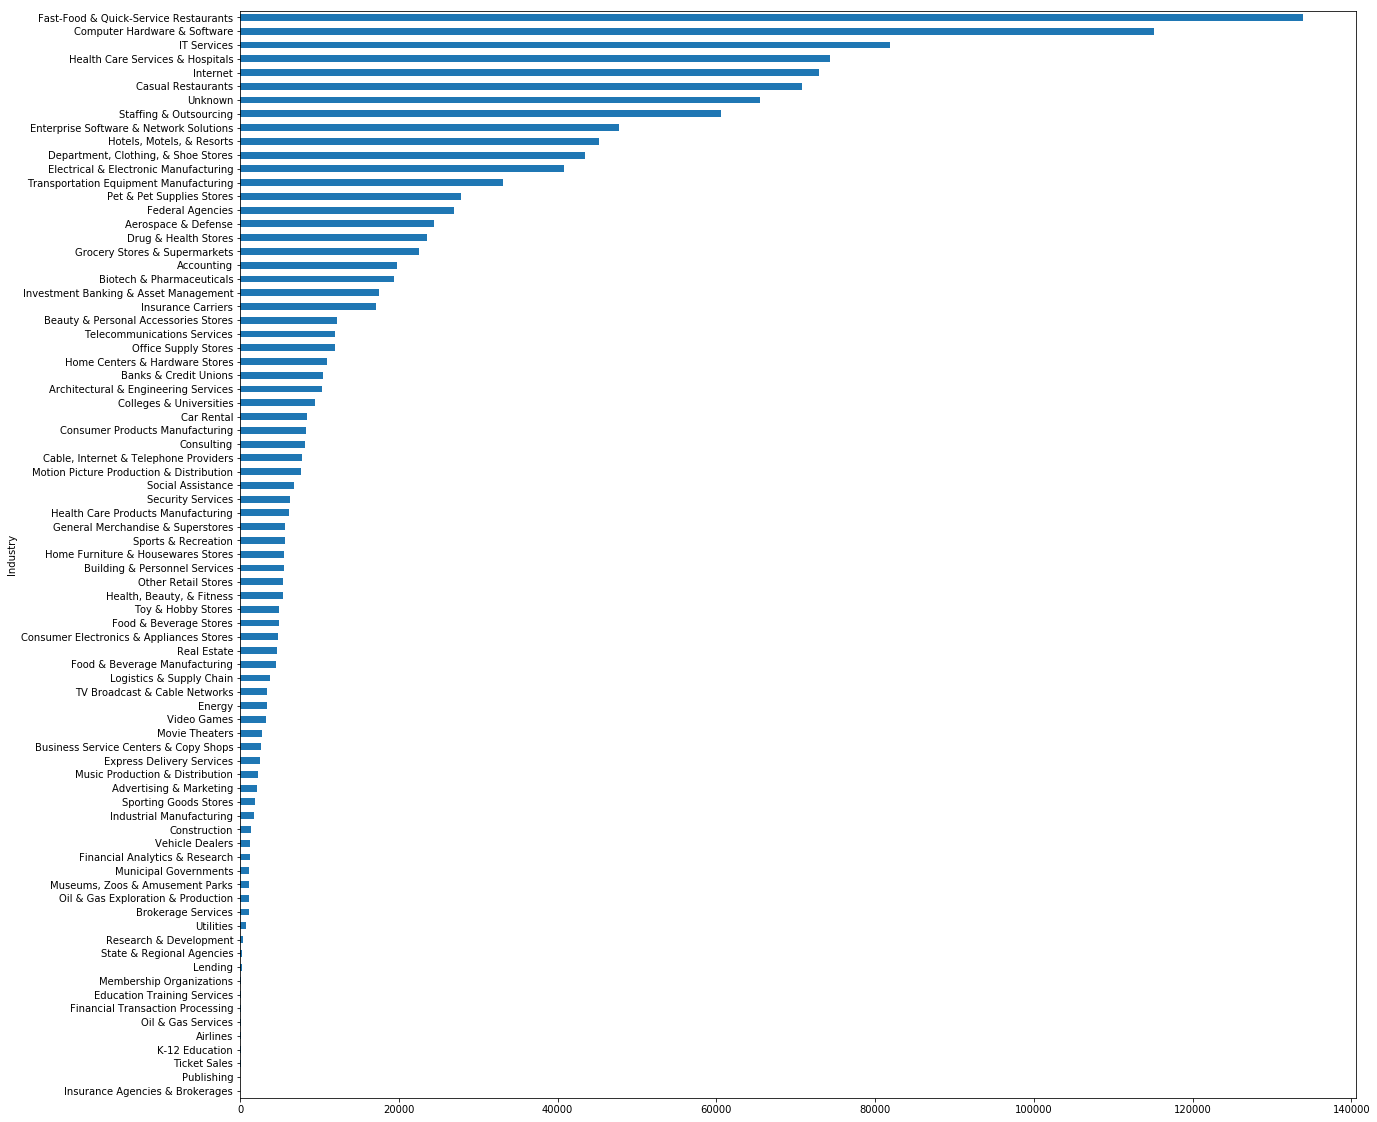

In [45]:
# prints the results of the Jobs available by sum values, ascending up
sum_job = sum_job['Jobs Available'].sort_values(ascending=True)
sum_chart = sum_job.plot.barh(figsize=(20,20))
sum_chart

In [143]:
# checking why pet companies have such a weird result, out of curiosity
# there's only two pet companies scraped so far so they have a bigger gap
pet = cleaned_df[cleaned_df['Industry'] == "Video Games"]
pet

,Benefits URL,Competitors,Founded,Headquarters,Industry,Jobs Available,Locations,Name,Now known as,Overview URL,Part of,Revenue,Salary URL,Size,Type,Website
93,https://www.glassdoor.com/Benefits/Electronic-...,"Riot Games, Google, Activision Blizzard",1982,"Redwood City, CA",Video Games,1600.0,"[Austin, TX, Baton Rouge, LA, Bucharest (Roman...",Electronic Arts,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$2 to $5 billion (USD) per year,https://www.glassdoor.com/Salary/Electronic-Ar...,5001 to 10000 employees,Company - Public (EA),www.ea.com
113,https://www.glassdoor.com/Benefits/PlayStation...,"Microsoft, Riot Games, Activision Blizzard",1994,"San Mateo, CA",Video Games,385.0,N/A,PlayStation,NaN,https://www.glassdoor.com/Overview/Working-at-...,Sony,$10+ billion (USD) per year,https://www.glassdoor.com/Salary/PlayStation-S...,5001 to 10000 employees,Subsidiary or Business Segment,www.playstation.com/en-us
127,https://www.glassdoor.com/Benefits/Zynga-US-Be...,NaN,2007,"San Francisco, CA",Video Games,62.0,N/A,Zynga,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$500 million to $1 billion (USD) per year,https://www.glassdoor.com/Salary/Zynga-Salarie...,1001 to 5000 employees,Company - Public (ZNGA),www.zynga.com
137,https://www.glassdoor.com/Benefits/Blizzard-En...,NaN,1994,"Irvine, CA",Video Games,173.0,N/A,Blizzard Entertainment,NaN,https://www.glassdoor.com/Overview/Working-at-...,Activision Blizzard,$1 to $2 billion (USD) per year,https://www.glassdoor.com/Salary/Blizzard-Ente...,1001 to 5000 employees,Subsidiary or Business Segment,www.blizzard.com
142,https://www.glassdoor.com/Benefits/Riot-Games-...,NaN,2006,"Los Angeles, CA",Video Games,139.0,N/A,Riot Games,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,Unknown / Non-Applicable,https://www.glassdoor.com/Salary/Riot-Games-Sa...,1001 to 5000 employees,Company - Private,www.riotgames.com
793,https://www.glassdoor.com/Benefits/DeNA-US-Ben...,"GREE International Entertainment, Zynga, Kabam",2010,"San Francisco, CA",Video Games,3.0,"[San Francisco, CA, Vancouver, BC]",DeNA,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,Unknown / Non-Applicable,https://www.glassdoor.com/Salary/DeNA-Salaries...,201 to 500 employees,Company - Public (2432),www.denajobs.com
794,https://www.glassdoor.com/Benefits/Activision-...,NaN,1979,"Santa Monica, CA",Video Games,148.0,"[Santa Monica, CA, Los Angeles, CA]",Activision Blizzard,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,$5 to $10 billion (USD) per year,https://www.glassdoor.com/Salary/Activision-Bl...,10000+ employees,Company - Public (ATVI),www.activisionblizzard.com
799,https://www.glassdoor.com/Benefits/Treyarch-US...,Unknown,1996,"Santa Monica, CA",Video Games,1.0,"[Santa Monica, CA]",Treyarch,NaN,https://www.glassdoor.com/Overview/Working-at-...,Activision,Unknown / Non-Applicable,https://www.glassdoor.com/Salary/Treyarch-Sala...,201 to 500 employees,Subsidiary or Business Segment,www.treyarch.com
813,https://www.glassdoor.com/Benefits/IGN-Enterta...,Unknown,1996,"San Francisco, CA",Video Games,1.0,"[Brisbane, CA, Costa Mesa, CA, San Francisco, CA]",IGN Entertainment,NaN,https://www.glassdoor.com/Overview/Working-at-...,Ziff Davis,$25 to $50 million (USD) per year,https://www.glassdoor.com/Salary/IGN-Entertain...,51 to 200 employees,Subsidiary or Business Segment,corp.ign.com
824,https://www.glassdoor.com/Benefits/Storm8-US-B...,Unknown,2009,"Redwood City, CA",Video Games,5.0,N/A,Storm8,NaN,https://www.glassdoor.com/Overview/Working-at-...,NaN,Unknown / Non-Applicable,https://www.glassdoor.com/Salary/Storm8-Salari...,201 to 500 employees,Company - Private,www.storm8.com


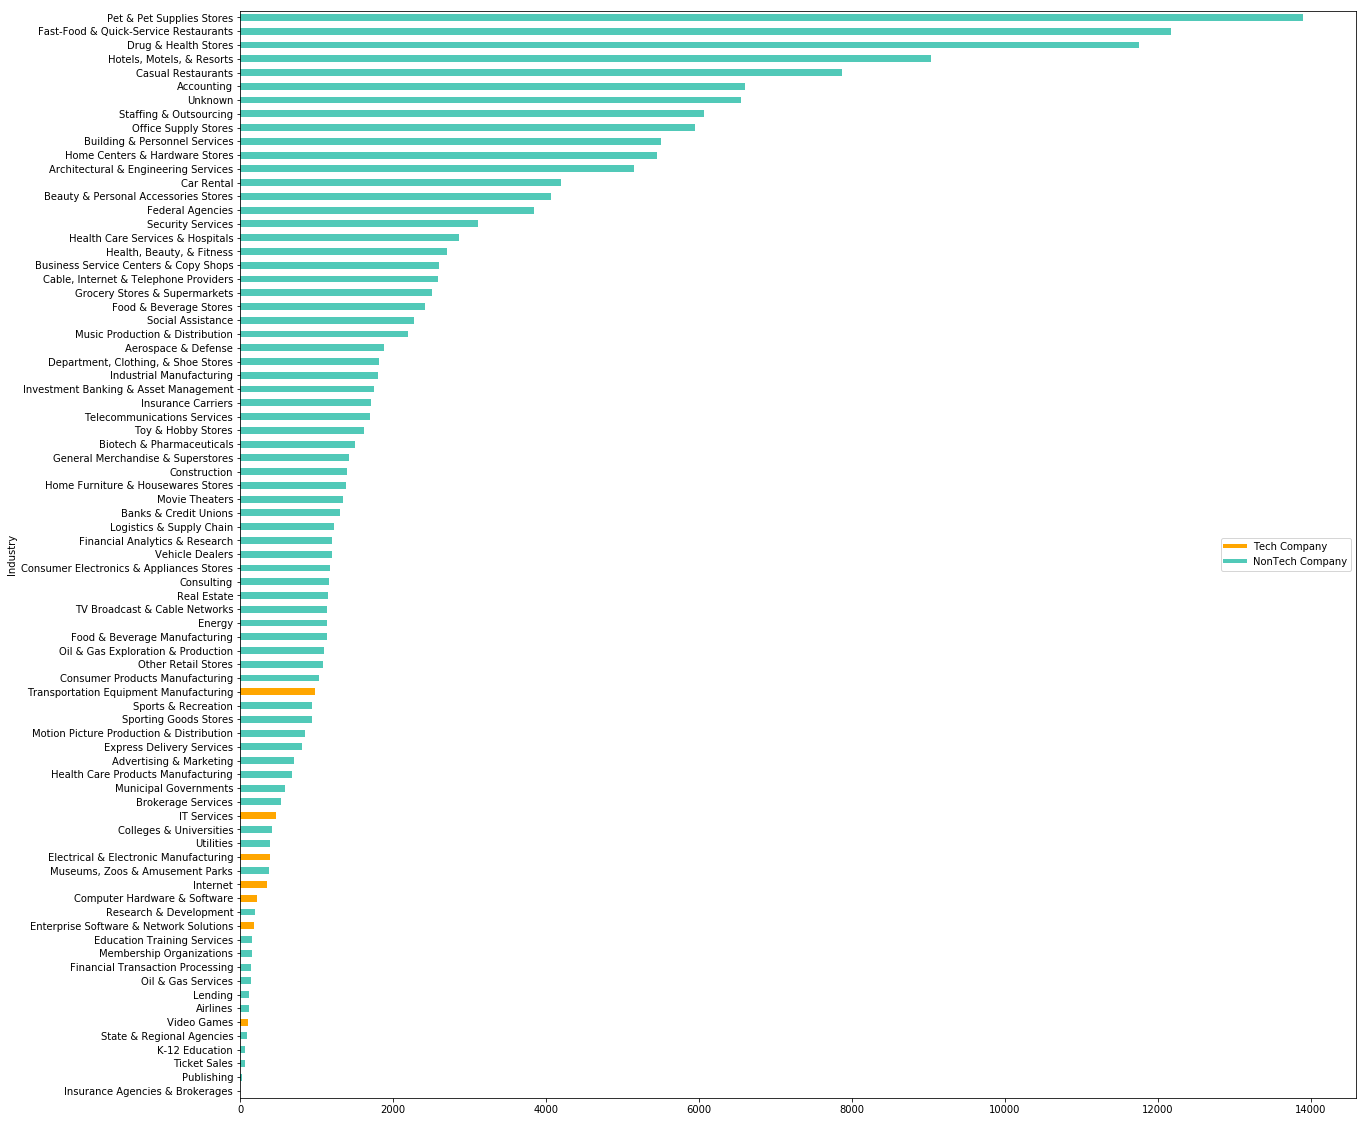

In [137]:
from matplotlib.lines import Line2D

# color the bars for the ones in a Tech Company
tech_company = ['Computer Hardware & Software',
                'Internet',
                'IT Services',
                'Video Games',
                'Enterprise Software & Network Solutions',
                'Transportation Equipment Manufacturing',
                'Electrical & Electronic Manufacturing']

# make a legend
legend_elements = [Line2D([0], [0], color='#ffa600', lw=4, label='Tech Company'),
                   Line2D([0], [0], color='#51c9b8', lw=4, label='NonTech Company')]

# sets the colors for the individual bars
colors = []
for value in mean_job.index: # keys are the names of the boys
    if value in tech_company:
        colors.append('#ffa600')
    else:
        colors.append('#51c9b8')

# creates the mean bar chart
c_mean_chart = mean_job.plot.barh(figsize=(20,20), color=colors)
c_mean_chart.legend(handles=legend_elements, loc="right")
plt.show()        

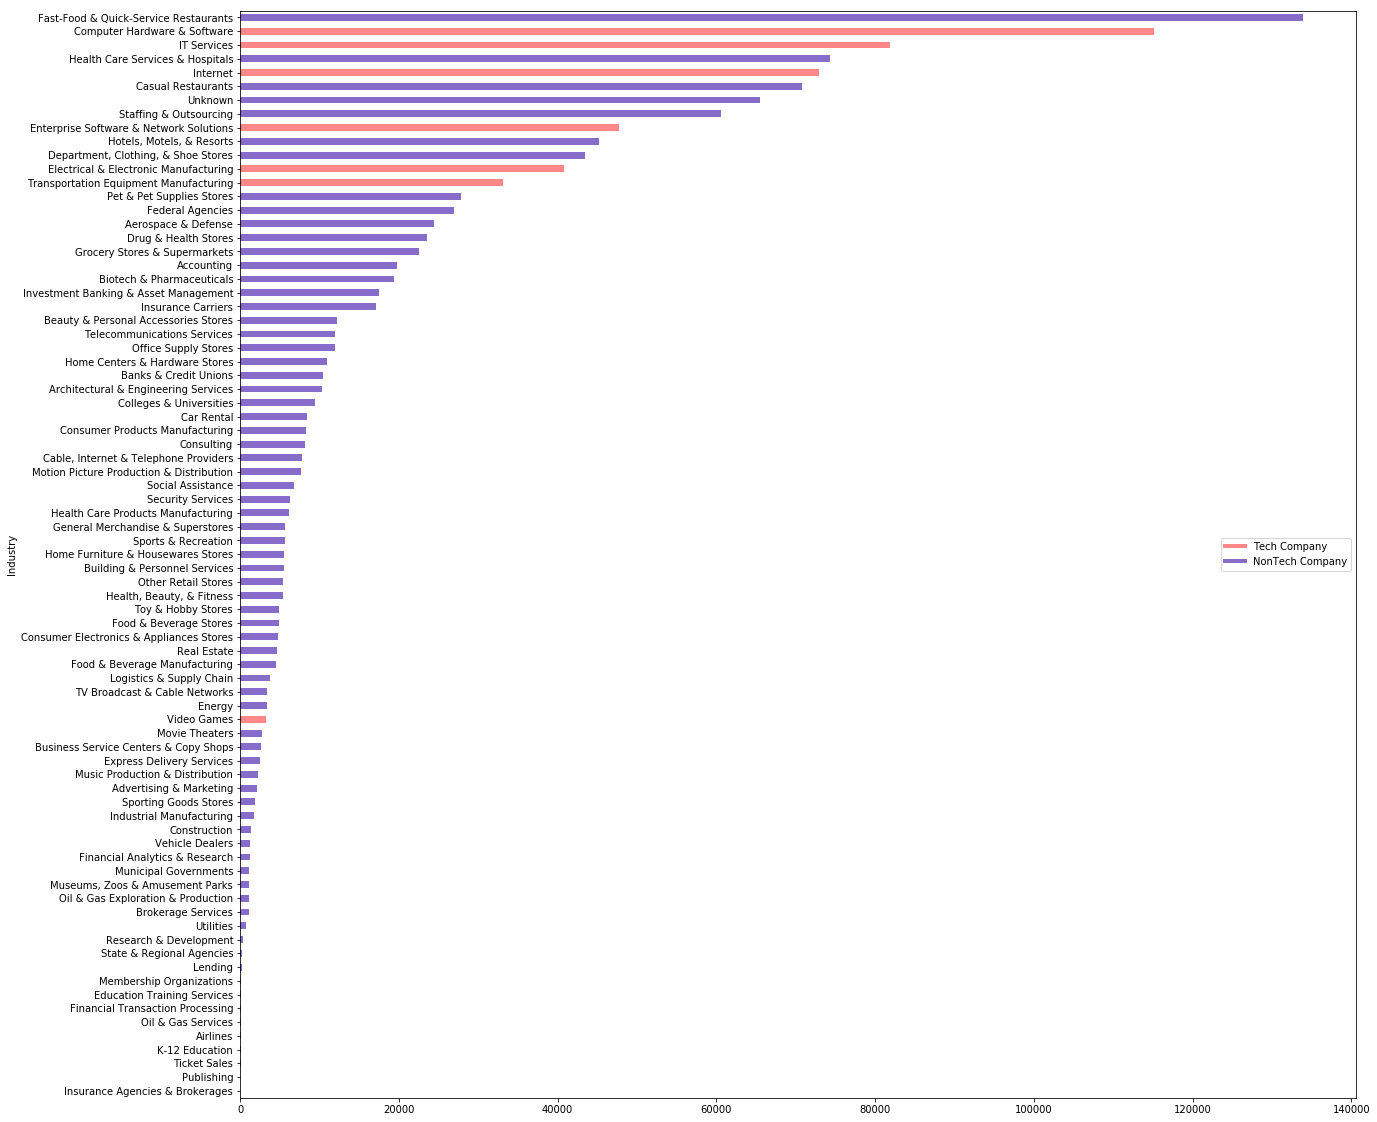

In [139]:
# show sum of jobs available chart
legend_elements = [Line2D([0], [0], color='#ff8787', lw=4, label='Tech Company'),
                   Line2D([0], [0], color='#876dc9', lw=4, label='NonTech Company')]

colors = []
for value in sum_job.index: # keys are the names of the boys
    if value in tech_company:
        colors.append('#ff8787')
    else:
        colors.append('#876dc9')

c_sum_chart = sum_job.plot.barh(figsize=(20,20), color=colors)
c_sum_chart.legend(handles=legend_elements, loc="right")
plt.show()